<a href="https://colab.research.google.com/github/maelfa/london_bike_sharing/blob/master/TFL_lbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

License

These licence terms and conditions apply to TfL's free transport data service and are based on version 2.0 of the Open Government Licence with specific amendments for Transport for London (the "Licence"). TfL may at any time revise this Licence without notice. It is up to you ("You") to regularly review the Licence, which will be available on this website, in case there are any changes. Your continued use of the transport data feeds You have opted to receive ("Information") after a change has been made to the Licence will be treated as Your acceptance of that change.

Using Information under this Licence
TfL grants You a worldwide, royalty-free, perpetual, non-exclusive Licence to use the Information subject to the conditions below (as varied from time to time).

This Licence does not affect Your freedom under fair dealing or fair use or any other copyright or database right exceptions and limitations.

This Licence shall apply from the date of registration and shall continue for the period the Information is provided to You or You breach the Licence.

Rights
You are free to:

Copy, publish, distribute and transmit the Information
Adapt the Information and
Exploit the Information commercially and non-commercially for example, by combining it with other Information, or by including it in Your own product or application
Requirements
You must, where You do any of the above:

Acknowledge TfL as the source of the Information by including the following attribution statement 'Powered by TfL Open Data'
Acknowledge that this Information contains Ordnance Survey derived data by including the following attribution statement: 'Contains OS data © Crown copyright and database rights 2016' and Geomni UK Map data © and database rights [2019]
Ensure our intellectual property rights, including all logos, design rights, patents and trademarks, are protected by following our design and branding guidelines
Limit traffic requests up to a maximum of 300 calls per minute per data feed. TfL reserves the right to throttle or limit access to feeds when it is believed the overall service is being degraded by excessive use and
Ensure the information You provide on registration is accurate
These are important conditions of this Licence and if You fail to comply with them the rights granted to You under this Licence, or any similar licence granted by TfL, will end automatically.

Exemptions
This Licence does not:

Transfer any intellectual property rights in the Information to You or any third party
Include personal data in the Information
Provide any rights to use the Information after this Licence has ended
Provide any rights to use any other intellectual property rights, including patents, trade marks, and design rights or permit You to:
Use data from the Oyster, Congestion Charging and Santander Cycles websites to populate or update any other software or database or
Use any automated system, software or process to extract content and/or data, including trawling, data mining and screen scraping
in relation to the Oyster, Congestion Charging and Santander Cycles websites, except where expressly permitted under a written licence agreement with TfL.
These are important conditions of this Licence and, if You fail to comply with them, the rights granted to You under this Licence, or any similar licence granted by TfL, will end automatically.

Non-endorsement
This Licence does not grant You any right to use the Information in a way that suggests any official status or that TfL endorses You or Your use of the Information.
Context

The purpose is to try predict the future bike shares.
Content

The data is acquired from 3 sources:

    Https://cycling.data.tfl.gov.uk/ 'Contains OS data © Crown copyright and database rights 2016' and Geomni UK Map data © and database rights [2019] 'Powered by TfL Open Data'
        freemeteo.com - weather data
        https://www.gov.uk/bank-holidays
        From 1/1/2015 to 31/12/2016 



The data from cycling dataset is grouped by "Start time", this represent the count of new bike shares grouped by hour. The long duration shares are not taken in the count.<br>
Metadata:<br>

"timestamp" - timestamp field for grouping the data<br>
"cnt" - the count of a new bike shares<br>
"t1" - real temperature in C<br>
"t2" - temperature in C "feels like"<br>
"hum" - humidity in percentage<br>
"windspeed" - wind speed in km/h<br>
"weathercode" - category of the weather<br>
"isholiday" - boolean field - 1 holiday / 0 non holiday<br>
"isweekend" - boolean field - 1 if the day is weekend<br>
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.<br>

"weathe_code" category description:<br>
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity<br> 2 = scattered clouds / few clouds<br> 3 = Broken clouds 4 = Cloudy<br> 7 = Rain/ light Rain shower/ Light rain<br> 10 = rain with thunderstorm<br> 26 = snowfall<br> 94 = Freezing Fog

## 0.Scope
- **The purpose is to try predict the future bike shares**

##1.Loading required libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot, lag_plot
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from scipy.ndimage.interpolation import shift
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout, LSTM, Bidirectional,GRU
from tensorflow.keras.callbacks import EarlyStopping
import warnings


##2.TFL loading london bike sharing dataset

In [ ]:
file_path = "/content/drive/My Drive/london_bike_sharing/datas/datasets_376751_731448_london_merged.csv"
file_path 

In [ ]:
lbs = pd.read_csv(file_path,sep=',', na_values=' ')

In [ ]:
df = lbs.copy()

## 3.Exploratory Data Analysis

**objective:** 
- brief data analysis the row TFL's london bike sharing dataset, to establish a futher strategies in deep data analysis 
- in the deep data analysis, the aim is to provid a report regarding all types of added value reagarding the the data in TFL's london bike sharing dataset  

## 3.1 Brief data analysis

**Defined the targets variable a personnal Machine Leaning Project:** <br>
- "cnt" - the count of a new bike shares<br>

**Dataset shape:** 17414, 10<br>

**variables type:** <br>
float64    8
int64      1
object     1
- 1 variables integer(quantitative) type<br>
- 8 variables float(4 qualitatives/ 4 categorical) type<br>
- 1 variables object (temporal) type <br><br>
⚠️ **"cnt"** is variable **type object**, the future probably we will probaly change it in times series<br>

**NA variables analysis:** <br>
- the dataset has no NA value, we won't need to drop them in the future<br><br>
**Duplicated variables analysis:** <br>
- the dataset has no duplicate value, we won't need to drop them in the future<br> 

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# dataset's shape
df.shape

In [ ]:
# dataset's features types analysis
df.dtypes.value_counts()

In [ ]:
# dataset's features types analysis
df.info()

In [ ]:
# dataset's NA values analysis
plt.figure(figsize=(12,12))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
# dataset's NA values analysis
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

In [ ]:
# dataset's duplicated analysis
df.duplicated().sum()

## 3.2 Deep data's features/ targets and values analytics

**Brief features engineering:** <br>
- "cnt" from object type to daytime type variables 
- we will creat some new future form "cnt" like "hour","day of month ", "day of the week", "month"
- Drop of the feature "id" 

**Features names & values analysis:**<br>

    - sex: 1.female/ 2.male/ 99. not specified
    - patient_type: 1.ambulatory/ 2.hospitalisation/ 99. not specified 
    - covid_res: 1.SARS-CoV-2's positive/ 2.SARS-CoV-2's negative/ 3.SARS-CoV-2's waiting for result
    - yes/no categorical values: 1.yes/ 2.no/ 97.Not Applicable/ 98.don't know/ 99. not specified  

    - "timestamp" - timestamp field for grouping the data
    - "cnt" - the count of a new bike shares
    - "t1" - real temperature in C
    - "t2" - temperature in C "feels like"
    - "hum" - humidity in percentage
    - "windspeed" - wind speed in km/h
    - "weathercode" - category of the weather
    - "isholiday" - boolean field - 1 holiday / 0 non holiday
    - "isweekend" - boolean field - 1 if the day is weekend
    - "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter

**"weathe_code" category description:**<br>
    
    - 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
    - 2 = scattered clouds / few clouds 
    - 3 = Broken clouds 
    - 4 = Cloudy 
    - 7 = Rain/ light Rain shower/ Light rain 
    - 10 = rain with thunderstorm 
    - 26 = snowfall 
    - 94 = Freezing Fog
**Stationary analysis :**

  as per the plots and the adfuller's test we can conclude about the stationary of the time series

**Seasonality analysis :**

  as per the plots and the seasonal decompose method, we can conclude about the seasonality of the times serie 
  

In [ ]:
df

#3.2.1 Brief features engineering:

In [ ]:
# tranforming serie from type object to seris
df["timestamp"]=pd.to_datetime(df["timestamp"])

In [ ]:
#set "timestamp" serie to index
df = df.set_index("timestamp")

In [ ]:
#creation of new feature hour
df["hour"]=df.index.hour

In [ ]:
#creation of new feature hour
df["month_day"]=df.index.day

In [ ]:
#creation of new feature hour
df["week_day"]=df.index.dayofweek

In [ ]:
#creation of new feature hour
df["month"]=df.index.month

In [ ]:
df.head()

In [ ]:
df.info()

#3.2.2 Features names & values analytics:

In [ ]:
for col in df.columns:
    print (f'{col:-<50} {df[col].unique()}')

In [ ]:
df_caterical_variable = df[["weather_code","is_holiday","is_weekend","season","hour","month_day","week_day", "month"]]

# 3.2.3 Stationary analysis: <br>
 - **As per the plot, it looks like the stationary series**

 - ADFuller test 

In [ ]:
plt.figure(figsize=(28,12))
df["cnt"].plot(linewidth=0.5, label= "cnt")
plt.title("the count of a new bike shares")
plt.legend()
plt.show()

In [ ]:
result = adfuller(df['cnt'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0]< result[4]["5%"]:
  print(" reject H0 - times series is stationary")
else:  
  print(" failled to reject H0 - times series is Non-stationary")

#3.2.4 Seasonality analysis <br>
 as we were expected, can observe year's seasonality of the data set

In [ ]:
decomposition_360 = seasonal_decompose(df['cnt'], freq=365, extrapolate_trend='freq')

- **With frequency of 365, we can observe the seasonality** 

In [ ]:
trend = decomposition_360.trend
seasonal = decomposition_360.seasonal
noise = decomposition_360.resid
plt.figure(figsize=(40,18))
plt.subplot(411)
plt.plot(df['cnt'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(noise, label='Noise')
plt.legend(loc='best')

In [ ]:
decomposition_7 = seasonal_decompose(df.loc['2016-06-01':'2016-06-07']["cnt"], freq=7, extrapolate_trend='freq')

- **With frequency of 7 wtihin one week, we can observe the seasonality** 

In [ ]:
trend = decomposition_7.trend
seasonal = decomposition_7.seasonal
noise = decomposition_7.resid
plt.figure(figsize=(40,18))
plt.subplot(411)
plt.plot(df.loc['2016-06-01':'2016-06-07']["cnt"], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(noise, label='Noise')
plt.legend(loc='best')

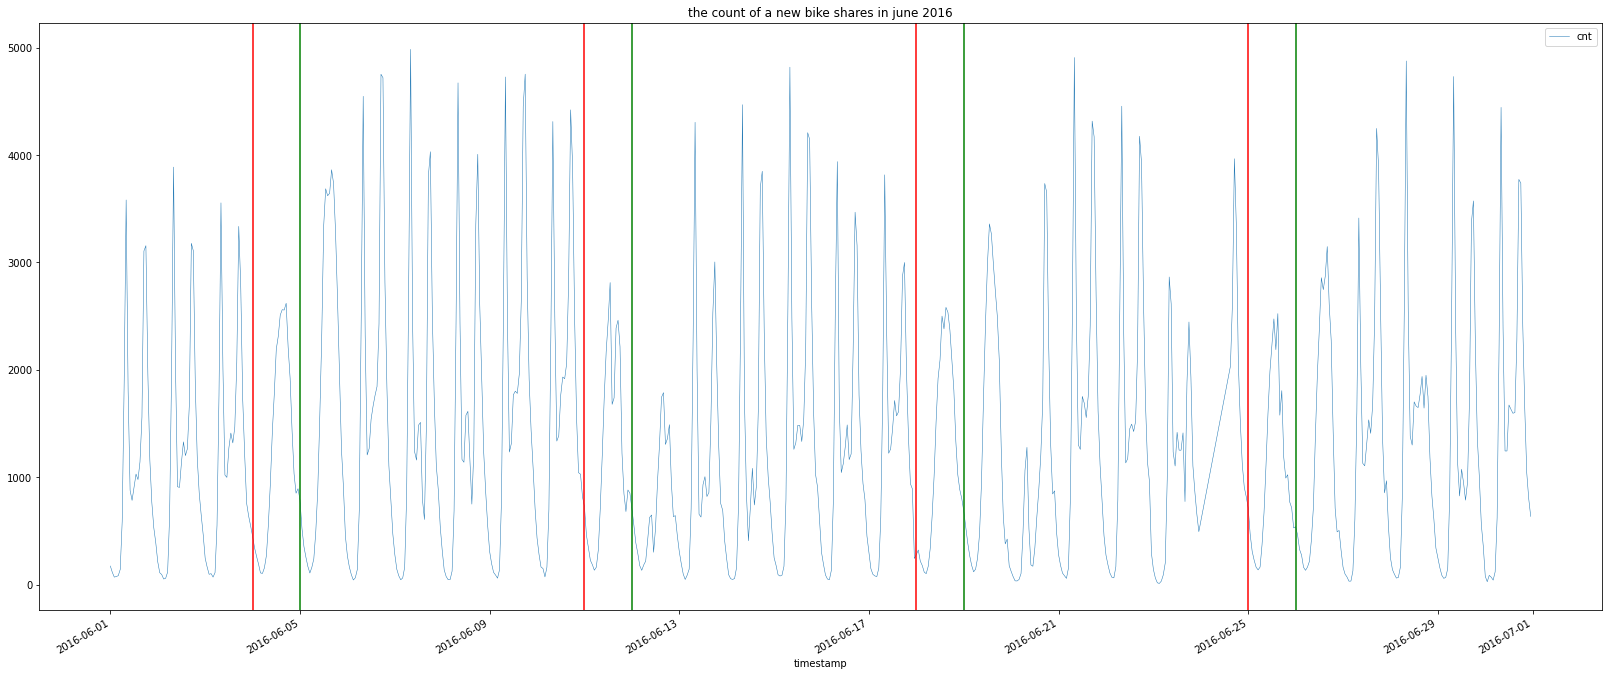

In [ ]:
plt.figure(figsize=(28,12))
df.loc['2016-06-01':'2016-06-30']["cnt"].plot(linewidth=0.5, label= "cnt")
plt.title("the count of a new bike shares in june 2016")
plt.axvline("2016-06-04", c='r')
plt.axvline("2016-06-11", c='r')
plt.axvline("2016-06-18", c='r')
plt.axvline("2016-06-25", c='r')
plt.axvline("2016-06-05", c='g')
plt.axvline("2016-06-12", c='g')
plt.axvline("2016-06-19", c='g')
plt.axvline("2016-06-26", c='g')
plt.legend()
plt.show()

In [ ]:
decomposition_24 = seasonal_decompose(df.loc['2016-06-01':'2016-06-07']["cnt"], freq=24, extrapolate_trend='freq')

- **With frequency of 24 wtihin one month, we can observe the seasonality** 

In [ ]:
trend = decomposition_24.trend
seasonal = decomposition_24.seasonal
noise = decomposition_24.resid
plt.figure(figsize=(32,18))
plt.subplot(411)
plt.plot(df.loc['2016-06-01':'2016-06-07']["cnt"], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(noise, label='Noise')
plt.legend(loc='best')

# 3.2.5 Features /Target analysis

- ** by ploting the 2 years of datas:**
  - "cnt - the count of a new bike shares"
  - "t1 - real temperature in C"
  - "t2 - temperature in C 'feels like'"
  -"hum - humidity in percentage"
  - "wind speed in km/h"

**We can conclude to visible relationship with "cnt" and the others features. It could be interesting to use them as exogenious paramters to predict our target** 

In [ ]:
plt.figure(figsize=(28,26))

ax1=plt.subplot(511)
ax1=df["cnt"].plot(linewidth=0.5, label= "cnt")
plt.title("cnt - the count of a new bike shares")

plt.subplot(512)
ax2=df["t1"].plot(linewidth=0.5, label= "t1")
ax2=plt.title("t1 - real temperature in C")

plt.subplot(513)
ax3=df["t2"].plot(linewidth=0.5, label= "t2")
ax3=plt.title("t2 - temperature in C 'feels like'")

plt.subplot(514)
ax4=df["hum"].plot(linewidth=0.5, label= "hum")
ax4=plt.title("hum - humidity in percentage")

plt.subplot(515)
ax5=df["wind_speed"].plot(linewidth=0.5, label= "wind_speed")
ax5=plt.title("wind speed in km/h")


plt.legend()
plt.show()

- ** by ploting the 1 year of datas:**
 
**We can conclude to visible relationship with "cnt" and the others features. It could be interesting to use them as exogenious paramters to predict our target** 

In [ ]:
plt.figure(figsize=(28,26))

ax1=plt.subplot(511)
ax1=df.loc['2016-01':'2016-12']["cnt"].plot(linewidth=0.5, label= "cnt")
ax1=plt.title("the count of a new bike shares")
ax1=plt.legend()
plt.subplot(512)
ax2=df.loc['2016-01':'2016-12']["t1"].plot(linewidth=0.5, label= "t1")
ax2=plt.title("t1 - real temperature in C")
ax2=plt.legend()
plt.subplot(513)
ax3=df.loc['2016-01':'2016-12']["t2"].plot(linewidth=0.5, label= "t2")
ax3=plt.title("t2 - temperature in C 'feels like'")
ax3=plt.legend()
plt.subplot(514)
ax4=df.loc['2016-01':'2016-12']["hum"].plot(linewidth=0.5, label= "hum")
ax4=plt.title("humidity in percentage")
ax4=plt.legend()

plt.subplot(515)
ax5=df.loc['2016-01':'2016-12']["wind_speed"].plot(linewidth=0.5, label= "wind_speed")
ax5=plt.title("wind speed in km/h")
ax5=plt.legend()



plt.show()

In [ ]:
plt.figure(figsize=(28,12))
df.loc['2016-06-01':'2016-06-30']["cnt"].plot(linewidth=0.5, label= "cnt")
plt.title("the count of a new bike shares in june 2016")
plt.legend()
plt.show()

- ** by ploting the 1 week of datas:**
 
**We can conclud to visible relationship with "cnt" and the others features. It could be interesting to use them as exogenious paramters to predict our target**

In [ ]:
plt.figure(figsize=(28,26))

ax1=plt.subplot(511)
ax1=df.loc['2016-06-01':'2016-06-30']["cnt"].plot(linewidth=0.5, label= "cnt")
plt.title("the count of a new bike shares")

plt.subplot(512)
ax2=df.loc['2016-06-01':'2016-06-30']["t1"].plot(linewidth=0.5, label= "t1")
ax2=plt.title("t1 - real temperature in C")

plt.subplot(513)
ax3=df.loc['2016-06-01':'2016-06-30']["t2"].plot(linewidth=0.5, label= "t2")
ax3=plt.title("t2 - temperature in C 'feels like'")

plt.subplot(514)
ax4=df.loc['2016-06-01':'2016-06-30']["hum"].plot(linewidth=0.5, label= "hum")
ax4=plt.title("humidity in percentage")

plt.subplot(515)
ax5=df.loc['2016-06-01':'2016-06-30']["wind_speed"].plot(linewidth=0.5, label= "wind_speed")
ax5=plt.title("wind speed in km/h")


plt.legend()
plt.show()

- **the count of a new bike shares for 2016 / features's values**

In [ ]:

for col in df.columns: 
  plt.figure(figsize=(40,12))
  sns.boxplot(x=col, y='cnt', data=df.loc['2016-01':'2016-12'])
  plt.title("Aggregated values by features/target")
  plt.show()

- **the count of a new bike shares for 2016 / features's mean values**

In [ ]:
df_columns_no_target= ['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season', 'hour', 'month_day', 'week_day', 'month']

In [ ]:
for col in df_columns_no_target:
  df.loc["2016",["cnt",col]].groupby(col).mean().plot()
  plt.title("Aggregated mean values by features/target")
  plt.show()

#3.2.6 Correlation analysis


In [ ]:
 plt.figure(figsize=(32,12))
autocorrelation_plot(df["cnt"])

In [ ]:
plt.figure(figsize=(32,12))
fig, ax= plt.subplots()

autocorrelation_plot(df["cnt"], ax=ax)
ax.set_xlim(0, 90)

In [ ]:

fig, ax= plt.subplots()

autocorrelation_plot(df["cnt"], ax=ax)
ax.set_xlim(0, 366)

- ACF and PACF plots
There seems to ba a quite strong autocorrelation over time between the current values and the values 365 days ago, meaning that there is a cyclical effect in the use of bike sharing

In [ ]:
lag_acf = acf(df["cnt"], nlags=365)
lag_pacf = pacf(df["cnt"], nlags=365, method='ols')

In [ ]:
plt.figure(figsize=(32,12))
#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df["cnt"])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df["cnt"])), linestyle='--', color='gray')
plt.title('Autocorrelation function')
#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df["cnt"])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df["cnt"])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation function')


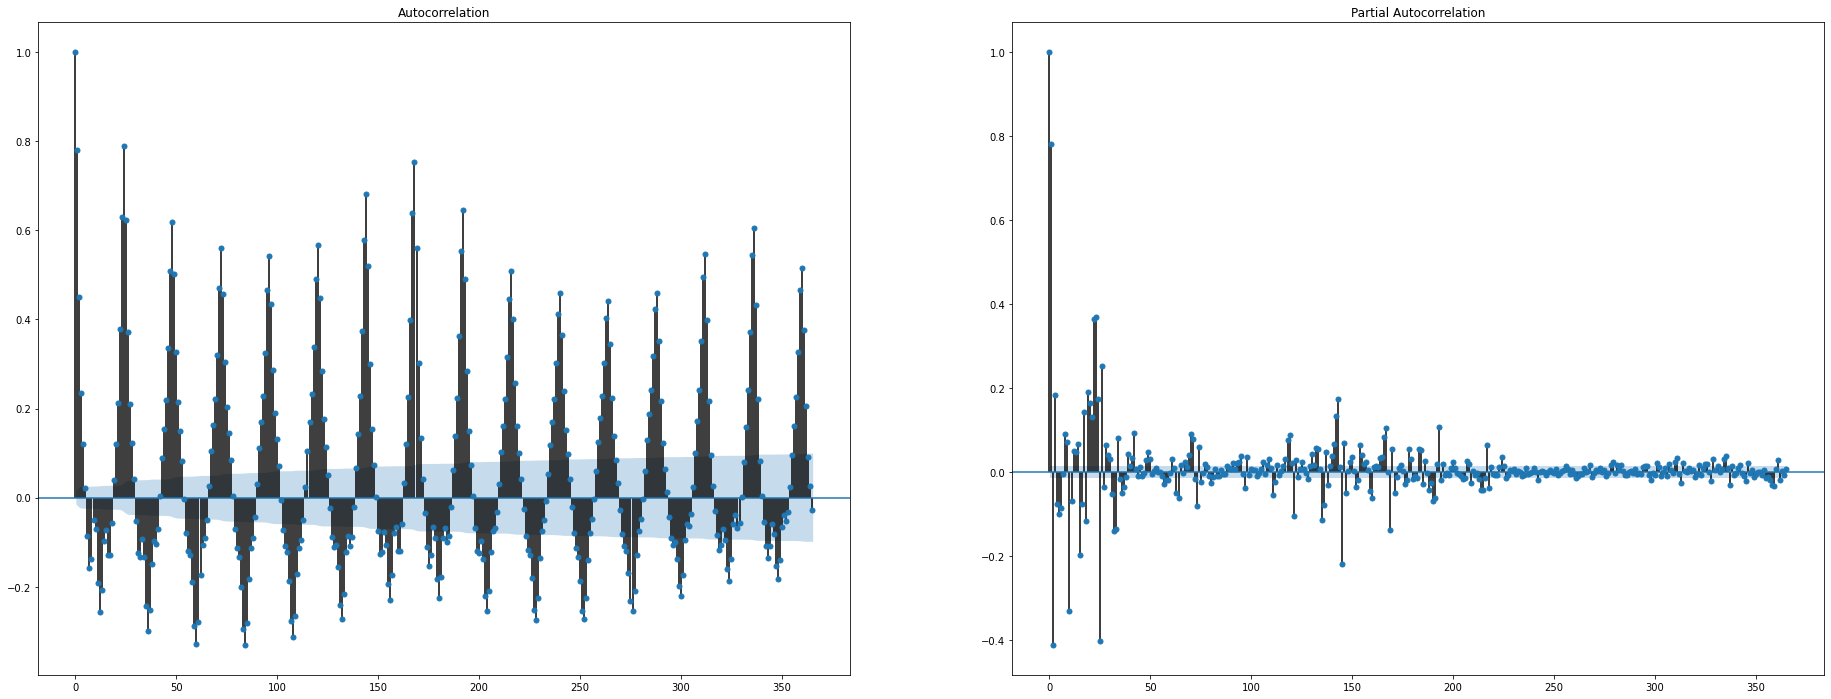

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(32,12))

fig = sm.graphics.tsa.plot_acf(df["cnt"], lags=365, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(df["cnt"], lags=365, ax=axes[1])

- **Scatter plot correlation features values / target**
we can observe for most of the plots some well organised scatter plot and with feature's values colored and ordered , so mean a strong corelation between features values and target

In [ ]:
for col in df.columns:
  plt.figure(figsize=(32,12))
  lag_plot(df.loc["2016"]["cnt"], c=df.loc["2016"][col][:-1], cmap= 'viridis')
  plt.title("series correlation with cnt/"+" "+str(col))
  plt.show()

- **Calculated correlation features/ target**

In [ ]:
for col in df.columns:
  print(f"correlation reslut between cnt and {col}:",df.loc["2016"]["cnt"].corr(df.loc["2016"][col][:-1]))
  
  

#3.2.7 Features/features analysis

we could oberved a cluster "t1,t2,cnt,hour " but not so stongly corelated 

In [ ]:
sns.clustermap(df.loc["2016"].corr())

In [ ]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month_day,week_day,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,3,1,1
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,3,1,1
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,3,1,1


# 4.RNN Modeling

#4.1 Pre - processing

In [ ]:
df_preproces=df.copy()

In [ ]:
def to_dummify (data):
  to_dummify = data.drop(['cnt', 't1', 't2', 'hum', 'wind_speed',  'hour', 'month_day', 'week_day', 'month'], axis=1)
  #print(2)
  dummies = pd.get_dummies(to_dummify, columns=to_dummify.columns, drop_first=True)
  dummies.columns
  return dummies

In [ ]:
def to_scale (data):
  to_scale = data[['cnt', 't1', 't2', 'hum', 'wind_speed']]
  #print(4)
  to_scale = (to_scale - to_scale.mean(axis=0))/(to_scale.std(axis=0))
  return to_scale

In [ ]:
def pre_process(data):
  #print(1)
  dummies = to_dummify (data)
  #print(3)
  scaled=to_scale (data)
  #print(5)
  df = pd.concat([scaled, dummies], axis=1)
  #print(6)
  df.shape
  df=df.reset_index()
  return df

In [ ]:
test,train = train_test_split(df_preproces, test_size=0.2, random_state=0, shuffle=False)

In [ ]:
train=pre_process(train)

In [ ]:
train.shape

(3483, 16)

In [ ]:
train

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,is_holiday_1.0,is_weekend_1.0,season_2.0,season_3.0
0,2016-08-10 03:00:00,-1.021379,0.020761,0.133064,0.066336,0.335534,0,0,0,0,0,0,0,0,0,0
1,2016-08-10 04:00:00,-1.006317,0.020761,0.133064,0.066336,0.054464,0,0,0,0,0,0,0,0,0,0
2,2016-08-10 05:00:00,-0.923920,-0.062900,0.059978,0.248895,-0.086071,0,0,0,0,0,0,0,0,0,0
3,2016-08-10 06:00:00,-0.308158,0.020761,0.133064,0.248895,0.194999,0,0,0,0,0,0,0,0,0,0
4,2016-08-10 07:00:00,1.041203,0.104423,0.206150,-0.116223,0.335534,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478,2017-01-03 19:00:00,-0.128302,-1.317827,-1.620995,0.358430,0.757139,0,1,0,0,0,0,0,0,0,1
3479,2017-01-03 20:00:00,-0.572183,-1.317827,-1.620995,0.358430,1.038209,0,0,1,0,0,0,0,0,0,1
3480,2017-01-03 21:00:00,-0.752924,-1.234165,-1.547909,0.175871,1.459814,0,0,1,0,0,0,0,0,0,1
3481,2017-01-03 22:00:00,-0.853041,-1.234165,-1.547909,-0.006688,1.319279,0,0,1,0,0,0,0,0,0,1


In [ ]:
test=pre_process(test)

In [ ]:
test.shape

(13931, 17)

In [ ]:
test

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,is_holiday_1.0,is_weekend_1.0,season_1.0,season_2.0,season_3.0
0,2015-01-04 00:00:00,-0.884951,-1.714954,-1.431866,1.510588,-1.315180,0,1,0,0,0,0,0,1,0,0,1
1,2015-01-04 01:00:00,-0.925931,-1.714954,-1.355529,1.510588,-1.440576,0,0,0,0,0,0,0,1,0,0,1
2,2015-01-04 02:00:00,-0.929656,-1.806505,-1.355529,1.755169,-2.067553,0,0,0,0,0,0,0,1,0,0,1
3,2015-01-04 03:00:00,-0.987401,-1.898056,-1.431866,1.999750,-2.067553,0,0,0,0,0,0,0,1,0,0,1
4,2015-01-04 04:00:00,-1.010685,-1.898056,-1.737213,1.510588,-1.252483,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,2016-08-09 22:00:00,-0.253491,0.665369,0.705563,-1.144866,0.314961,0,0,0,0,0,0,0,0,1,0,0
13927,2016-08-09 23:00:00,-0.591574,0.482267,0.552889,-0.865344,-0.061225,0,0,0,0,0,0,0,0,1,0,0
13928,2016-08-10 00:00:00,-0.773188,0.390716,0.476553,-0.585823,0.064170,0,0,0,0,0,0,0,0,1,0,0
13929,2016-08-10 01:00:00,-0.931519,0.299165,0.400216,-0.306302,-0.312016,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
final_df = pd.concat([train, test])
final_df.shape

(17414, 17)

In [ ]:
final_df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,is_holiday_1.0,is_weekend_1.0,season_2.0,season_3.0,season_1.0
0,2016-08-10 03:00:00,-1.021379,0.020761,0.133064,0.066336,0.335534,0,0,0,0,0,0,0,0,0,0,NaN
1,2016-08-10 04:00:00,-1.006317,0.020761,0.133064,0.066336,0.054464,0,0,0,0,0,0,0,0,0,0,NaN
2,2016-08-10 05:00:00,-0.923920,-0.062900,0.059978,0.248895,-0.086071,0,0,0,0,0,0,0,0,0,0,NaN
3,2016-08-10 06:00:00,-0.308158,0.020761,0.133064,0.248895,0.194999,0,0,0,0,0,0,0,0,0,0,NaN
4,2016-08-10 07:00:00,1.041203,0.104423,0.206150,-0.116223,0.335534,1,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,2016-08-09 22:00:00,-0.253491,0.665369,0.705563,-1.144866,0.314961,0,0,0,0,0,0,0,0,0,0,1.0
13927,2016-08-09 23:00:00,-0.591574,0.482267,0.552889,-0.865344,-0.061225,0,0,0,0,0,0,0,0,0,0,1.0
13928,2016-08-10 00:00:00,-0.773188,0.390716,0.476553,-0.585823,0.064170,0,0,0,0,0,0,0,0,0,0,1.0
13929,2016-08-10 01:00:00,-0.931519,0.299165,0.400216,-0.306302,-0.312016,0,0,0,0,0,0,0,0,0,0,1.0


In [ ]:
final_df=final_df.fillna(0)

In [ ]:
(final_df.isna().sum()/final_df.shape[0]).sort_values(ascending=True)

timestamp            0.0
season_2.0           0.0
is_weekend_1.0       0.0
is_holiday_1.0       0.0
weather_code_26.0    0.0
weather_code_10.0    0.0
weather_code_7.0     0.0
season_3.0           0.0
weather_code_4.0     0.0
weather_code_2.0     0.0
wind_speed           0.0
hum                  0.0
t2                   0.0
t1                   0.0
cnt                  0.0
weather_code_3.0     0.0
season_1.0           0.0
dtype: float64

In [ ]:
def processData(data, past):
    X,Y = [],[]
    for i in range(len(data)-past-1):
        X.append(data.iloc[i:i+past, 1:data.shape[1]].values)
        Y.append(data.iloc[i+past, 1])

    return np.array(X),np.array(Y)
lookback = 24

X, y = processData(final_df, lookback)
X.shape, y.shape

((17389, 24, 16), (17389,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

#4.2 RNN with simple RNN layers

Epoch 1/500
109/109 [==============================] - 5s 44ms/step - loss: 0.4119 - val_loss: 0.1770
Epoch 2/500
109/109 [==============================] - 5s 42ms/step - loss: 0.1168 - val_loss: 0.1051
Epoch 3/500
109/109 [==============================] - 5s 41ms/step - loss: 0.0748 - val_loss: 0.0831
Epoch 4/500
109/109 [==============================] - 5s 42ms/step - loss: 0.0593 - val_loss: 0.0695
Epoch 5/500
109/109 [==============================] - 5s 42ms/step - loss: 0.0505 - val_loss: 0.0625
Epoch 6/500
109/109 [==============================] - 5s 42ms/step - loss: 0.0447 - val_loss: 0.0567
Epoch 7/500
109/109 [==============================] - 5s 42ms/step - loss: 0.0404 - val_loss: 0.0525
Epoch 8/500
109/109 [==============================] - 5s 41ms/step - loss: 0.0373 - val_loss: 0.0487
Epoch 9/500
109/109 [==============================] - 5s 42ms/step - loss: 0.0346 - val_loss: 0.0474
Epoch 10/500
109/109 [==============================] - 4s 40ms/step - loss: 0.033

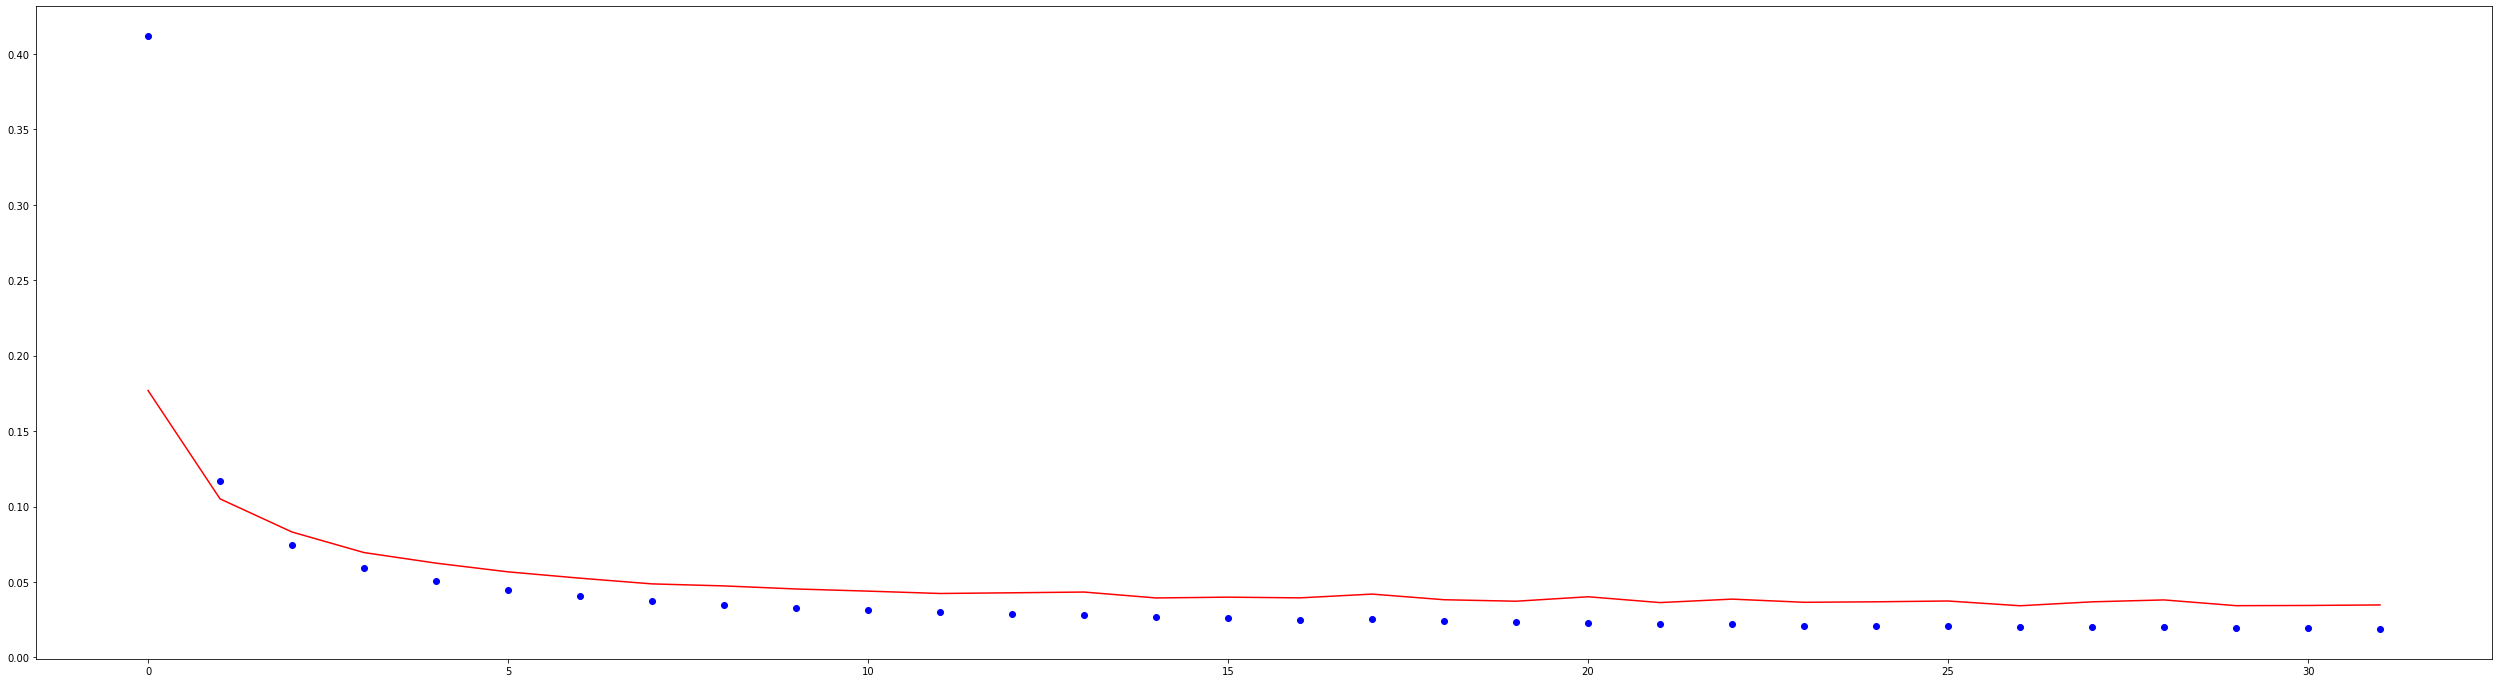

In [ ]:
def my_RNN():

    model = Sequential()
    model.add(SimpleRNN(units=32, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
    model.add(SimpleRNN(units=32, return_sequences=True))
    model.add(SimpleRNN(units=32, return_sequences=False))

    model.add(Dense(units=1, activation='linear'))

    return model
callbacks = [EarlyStopping(patience=5, restore_best_weights=True)]
model = my_RNN()

model.compile(optimizer='adam',
              loss='mse')

history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=500, batch_size=128,callbacks=callbacks)
history_dict=history.history

loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
plt.figure(figsize=(44,12))
plt.plot(loss_values, 'bo', label='train loss')
plt.plot(val_loss_values, 'r', label='validation train loss')

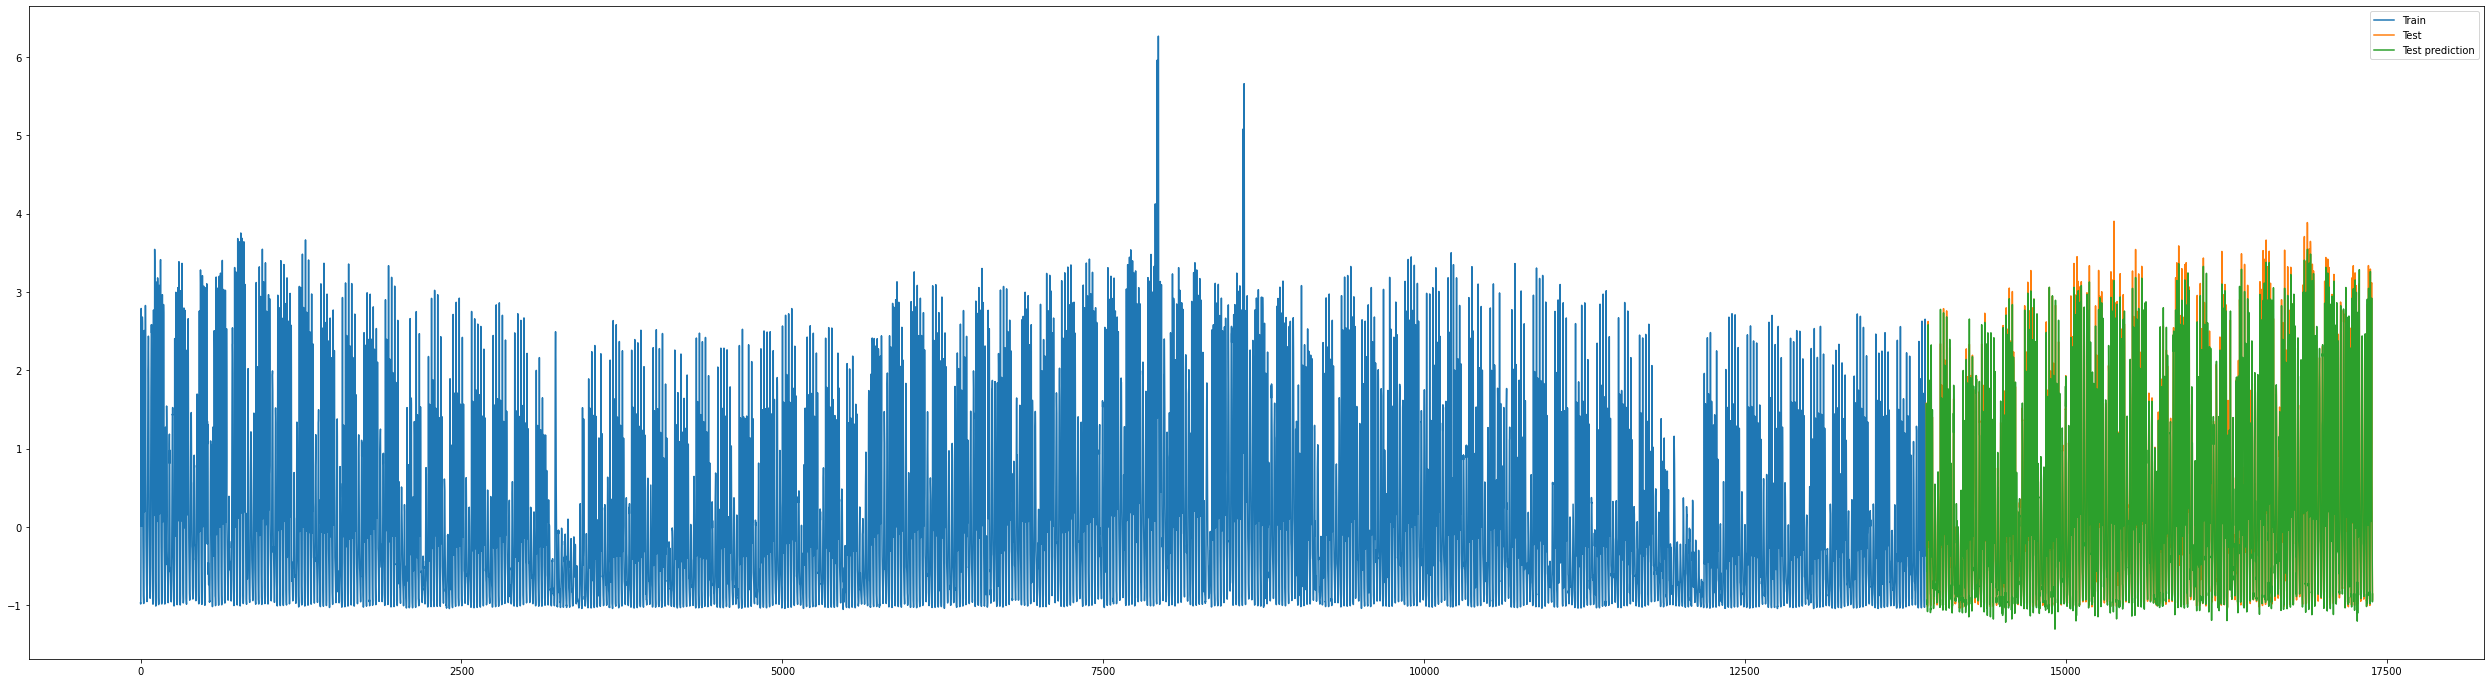

In [ ]:
plt.figure(figsize=(44,12))
plt.plot(np.arange(len(X_train)), y_train, label='Train')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), model.predict(X_test), label='Test prediction')
plt.legend()
plt.show()

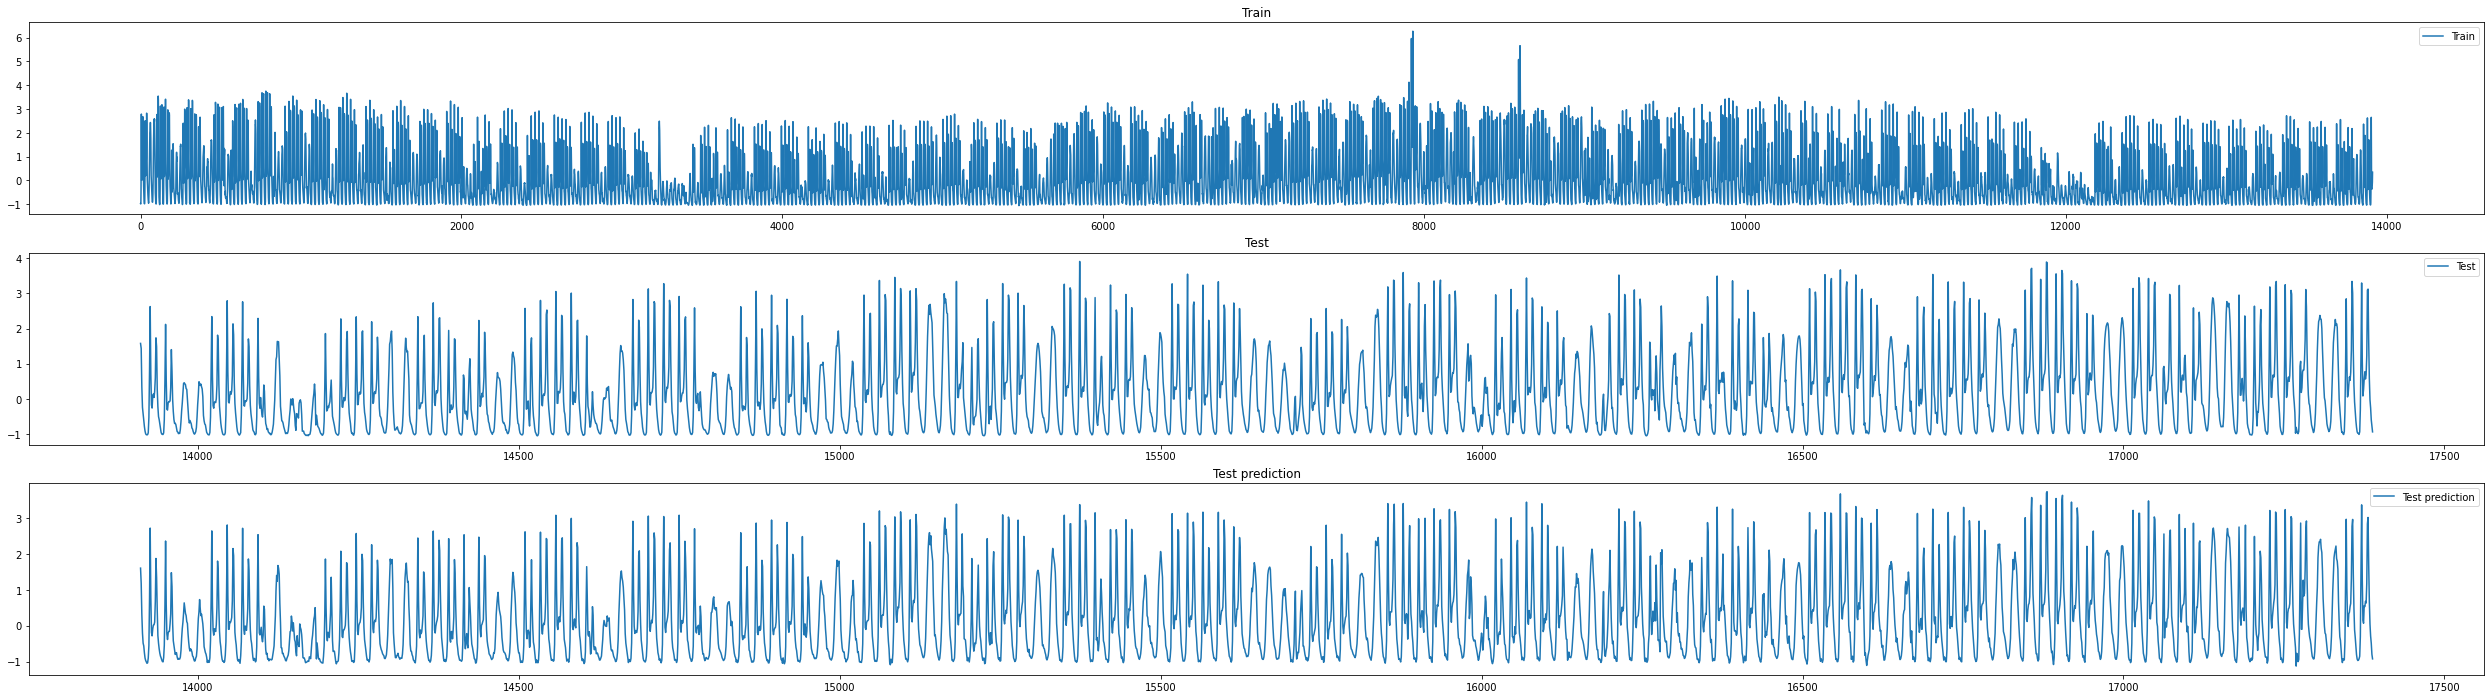

In [ ]:

plt.figure(figsize=(44,12))

plt.subplot(311)
ax1=plt.plot(np.arange(len(X_train)), y_train, label='Train')
ax1=plt.title('Train')
plt.legend()
plt.subplot(312)
ax2=plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
ax2=plt.title('Test')
plt.legend()
plt.subplot(313)
ax3=plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), model.predict(X_test), label='Test prediction')
ax3=plt.title('Test prediction')
plt.legend()
plt.show()

#4.3 RNN with LSTM layers

Epoch 1/5000
109/109 [==============================] - 11s 101ms/step - loss: 0.6809 - val_loss: 0.5710
Epoch 2/5000
109/109 [==============================] - 11s 98ms/step - loss: 0.3180 - val_loss: 0.1507
Epoch 3/5000
109/109 [==============================] - 11s 97ms/step - loss: 0.0827 - val_loss: 0.0662
Epoch 4/5000
109/109 [==============================] - 11s 99ms/step - loss: 0.0522 - val_loss: 0.0554
Epoch 5/5000
109/109 [==============================] - 11s 98ms/step - loss: 0.0417 - val_loss: 0.0513
Epoch 6/5000
109/109 [==============================] - 11s 98ms/step - loss: 0.0341 - val_loss: 0.0611
Epoch 7/5000
109/109 [==============================] - 11s 97ms/step - loss: 0.0325 - val_loss: 0.0438
Epoch 8/5000
109/109 [==============================] - 11s 100ms/step - loss: 0.0300 - val_loss: 0.0368
Epoch 9/5000
109/109 [==============================] - 11s 97ms/step - loss: 0.0283 - val_loss: 0.0425
Epoch 10/5000
109/109 [==============================] - 11s 9

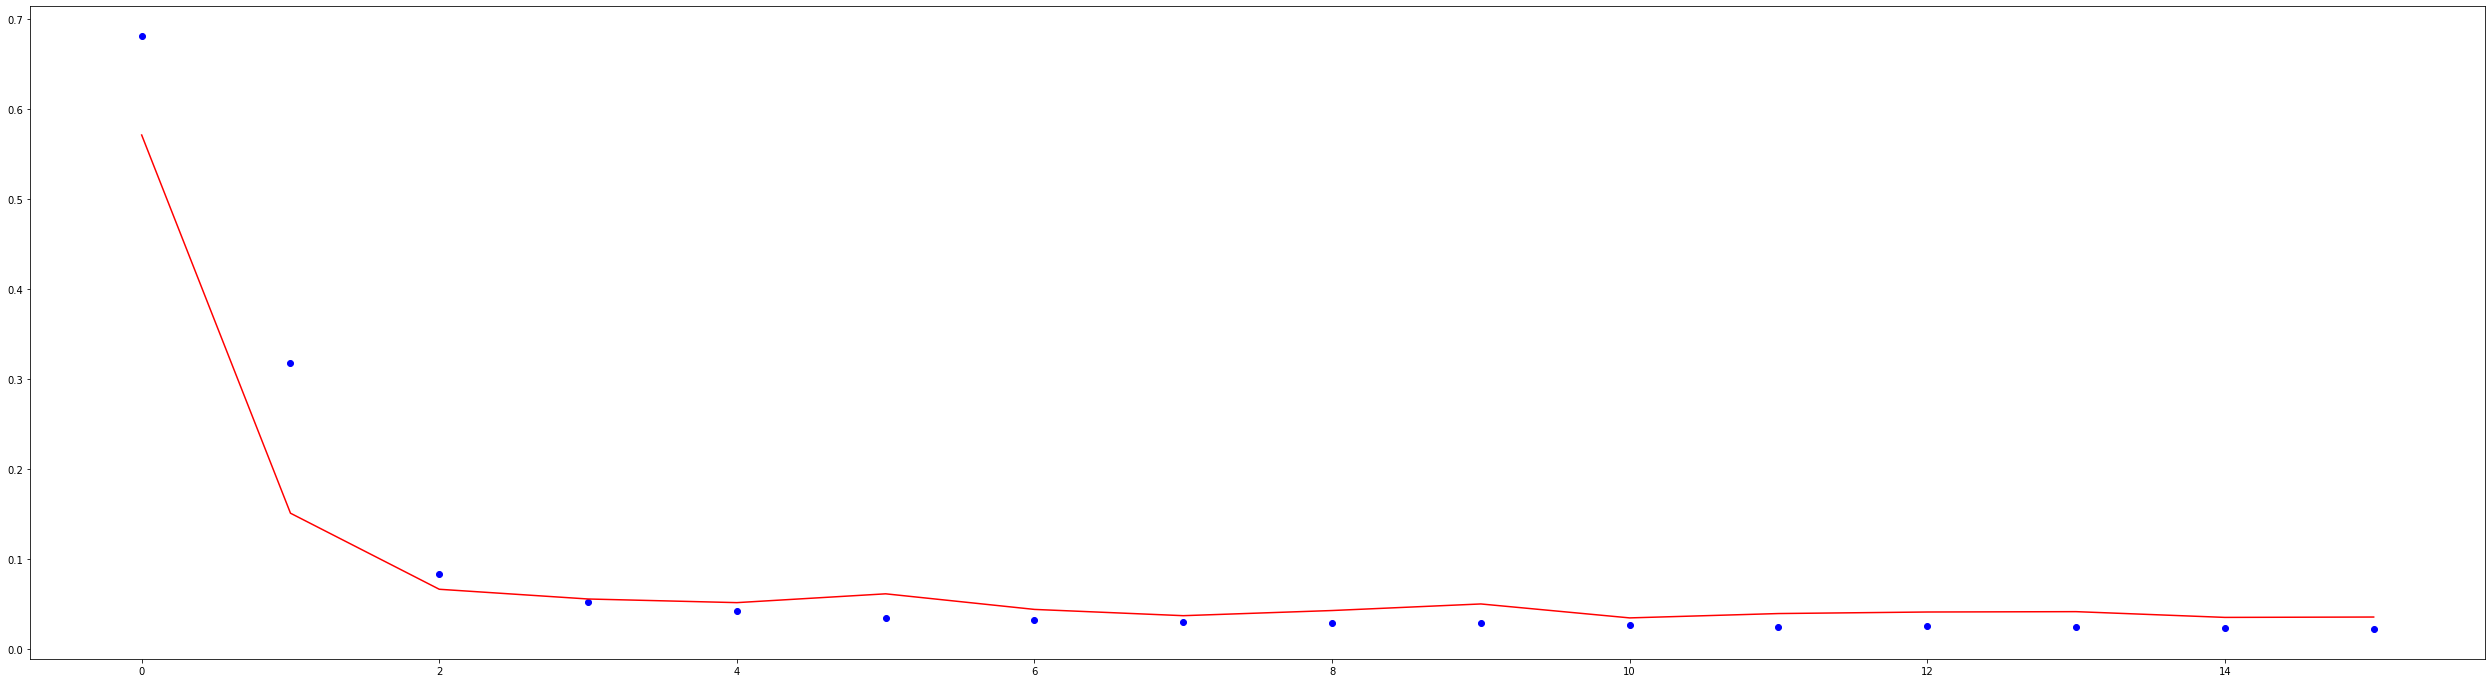

In [ ]:
def my_LSTM():

    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]),activation='relu'))
    model.add(LSTM(units=64, return_sequences=True,activation='relu'))
    model.add(LSTM(units=64, return_sequences=False,activation='relu'))

    model.add(Dense(units=1, activation='linear'))
    

    return model
callbacks = [EarlyStopping(patience=5, restore_best_weights=True)]
model = my_LSTM()

model.compile(optimizer='adam',
              loss='mse')

history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=5000, batch_size=128, callbacks=callbacks)
history_dict=history.history

loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
plt.figure(figsize=(44,12))
plt.plot(loss_values, 'bo', label='train loss')
plt.plot(val_loss_values, 'r', label='validation train loss')

In [ ]:
#plt.plot(history_lstm.history_lstm['loss'], lable= "train")
#plt.plot(history_lstm.history_lstm'val_loss'], lable= "validation")
#plt.legend()

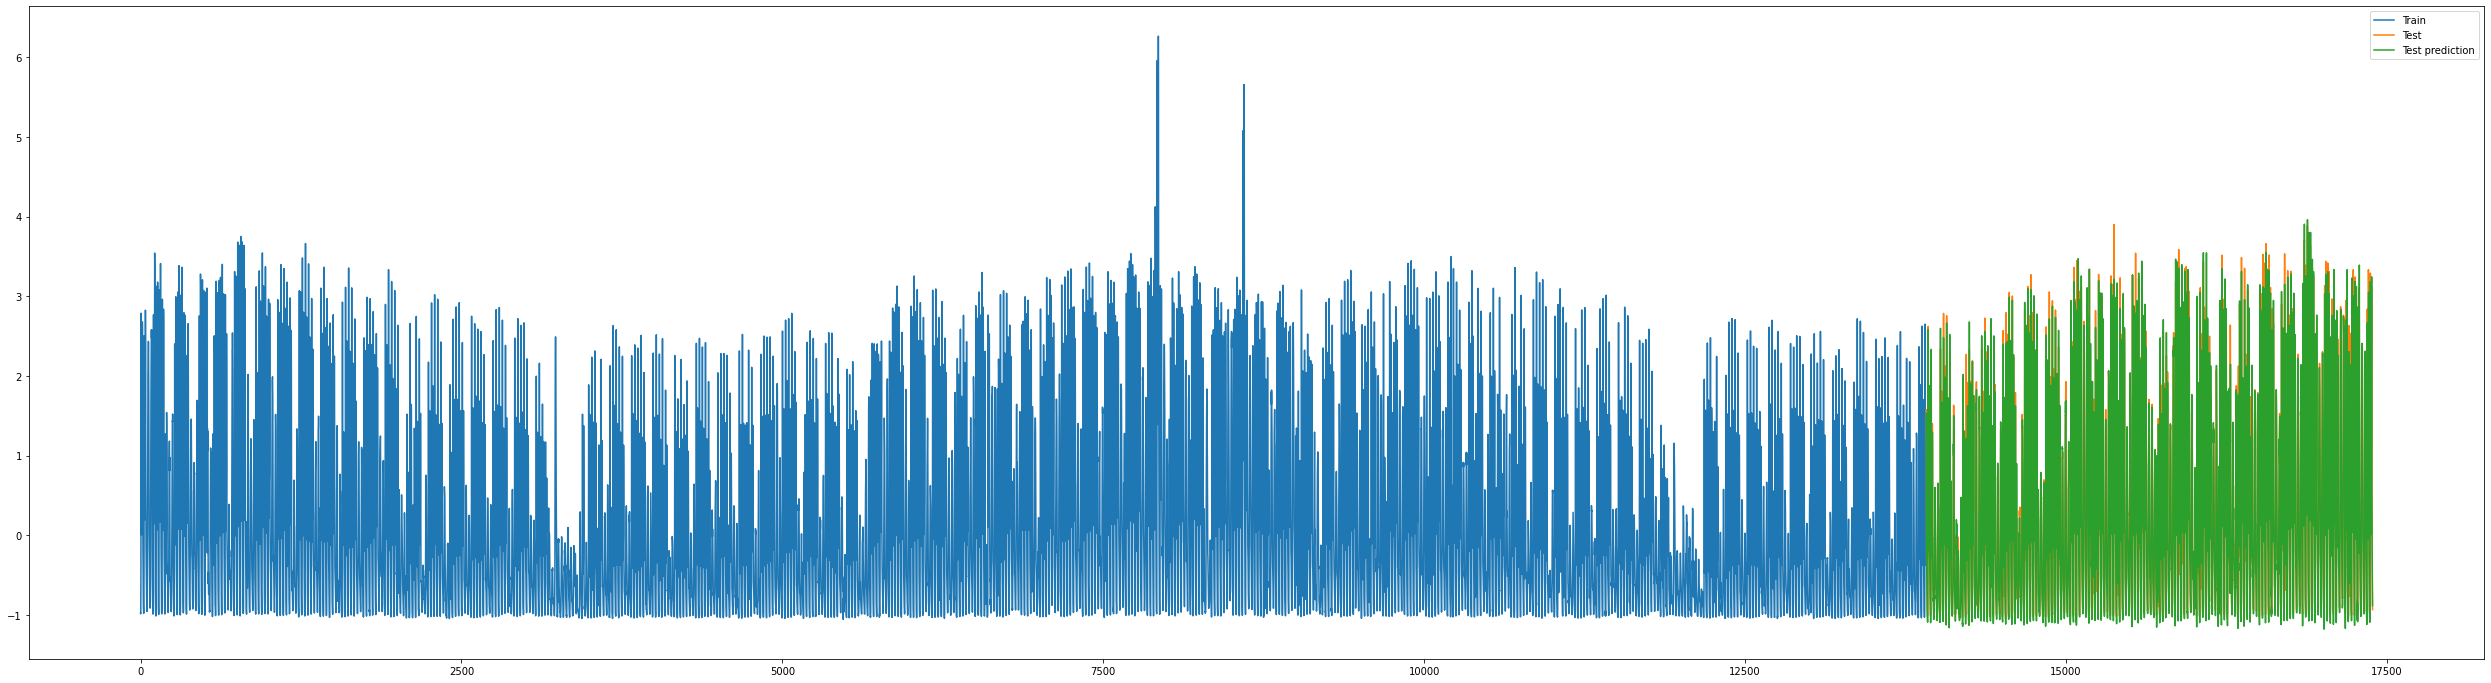

In [ ]:
plt.figure(figsize=(44,12))
plt.plot(np.arange(len(X_train)), y_train, label='Train')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), model.predict(X_test), label='Test prediction')
plt.legend()
plt.show()

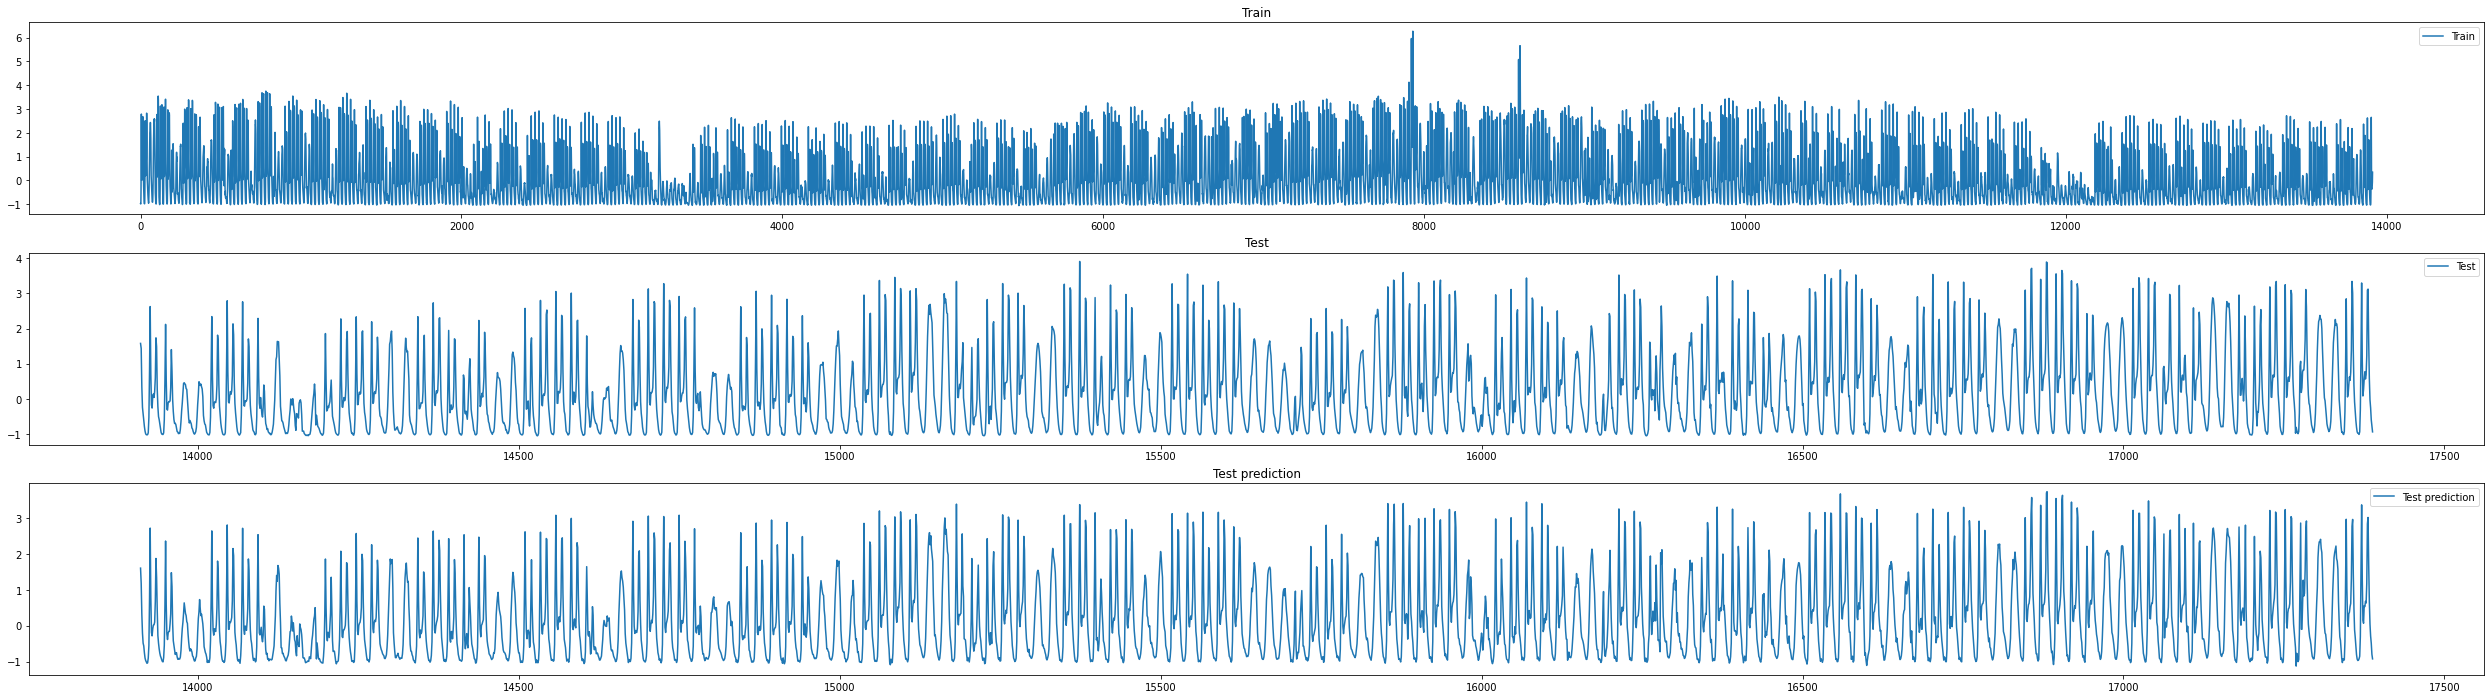

In [ ]:
plt.figure(figsize=(44,12))

plt.subplot(311)
ax1=plt.plot(np.arange(len(X_train)), y_train, label='Train')
ax1=plt.title('Train')
plt.legend()
plt.subplot(312)
ax2=plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
ax2=plt.title('Test')
plt.legend()
plt.subplot(313)
ax3=plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), model.predict(X_test), label='Test prediction')
ax3=plt.title('Test prediction')
plt.legend()
plt.show()

#4.4 RNN with GRU layers

Epoch 1/5000
109/109 [==============================] - 14s 125ms/step - loss: 0.4148 - val_loss: 0.1133
Epoch 2/5000
109/109 [==============================] - 14s 125ms/step - loss: 0.0745 - val_loss: 0.0810
Epoch 3/5000
109/109 [==============================] - 14s 125ms/step - loss: 0.0569 - val_loss: 0.0628
Epoch 4/5000
109/109 [==============================] - 13s 123ms/step - loss: 0.0459 - val_loss: 0.0573
Epoch 5/5000
109/109 [==============================] - 14s 125ms/step - loss: 0.0383 - val_loss: 0.0478
Epoch 6/5000
109/109 [==============================] - 13s 123ms/step - loss: 0.0331 - val_loss: 0.0454
Epoch 7/5000
109/109 [==============================] - 13s 124ms/step - loss: 0.0307 - val_loss: 0.0434
Epoch 8/5000
109/109 [==============================] - 13s 123ms/step - loss: 0.0259 - val_loss: 0.0389
Epoch 9/5000
109/109 [==============================] - 13s 124ms/step - loss: 0.0250 - val_loss: 0.0392
Epoch 10/5000
109/109 [==============================] 

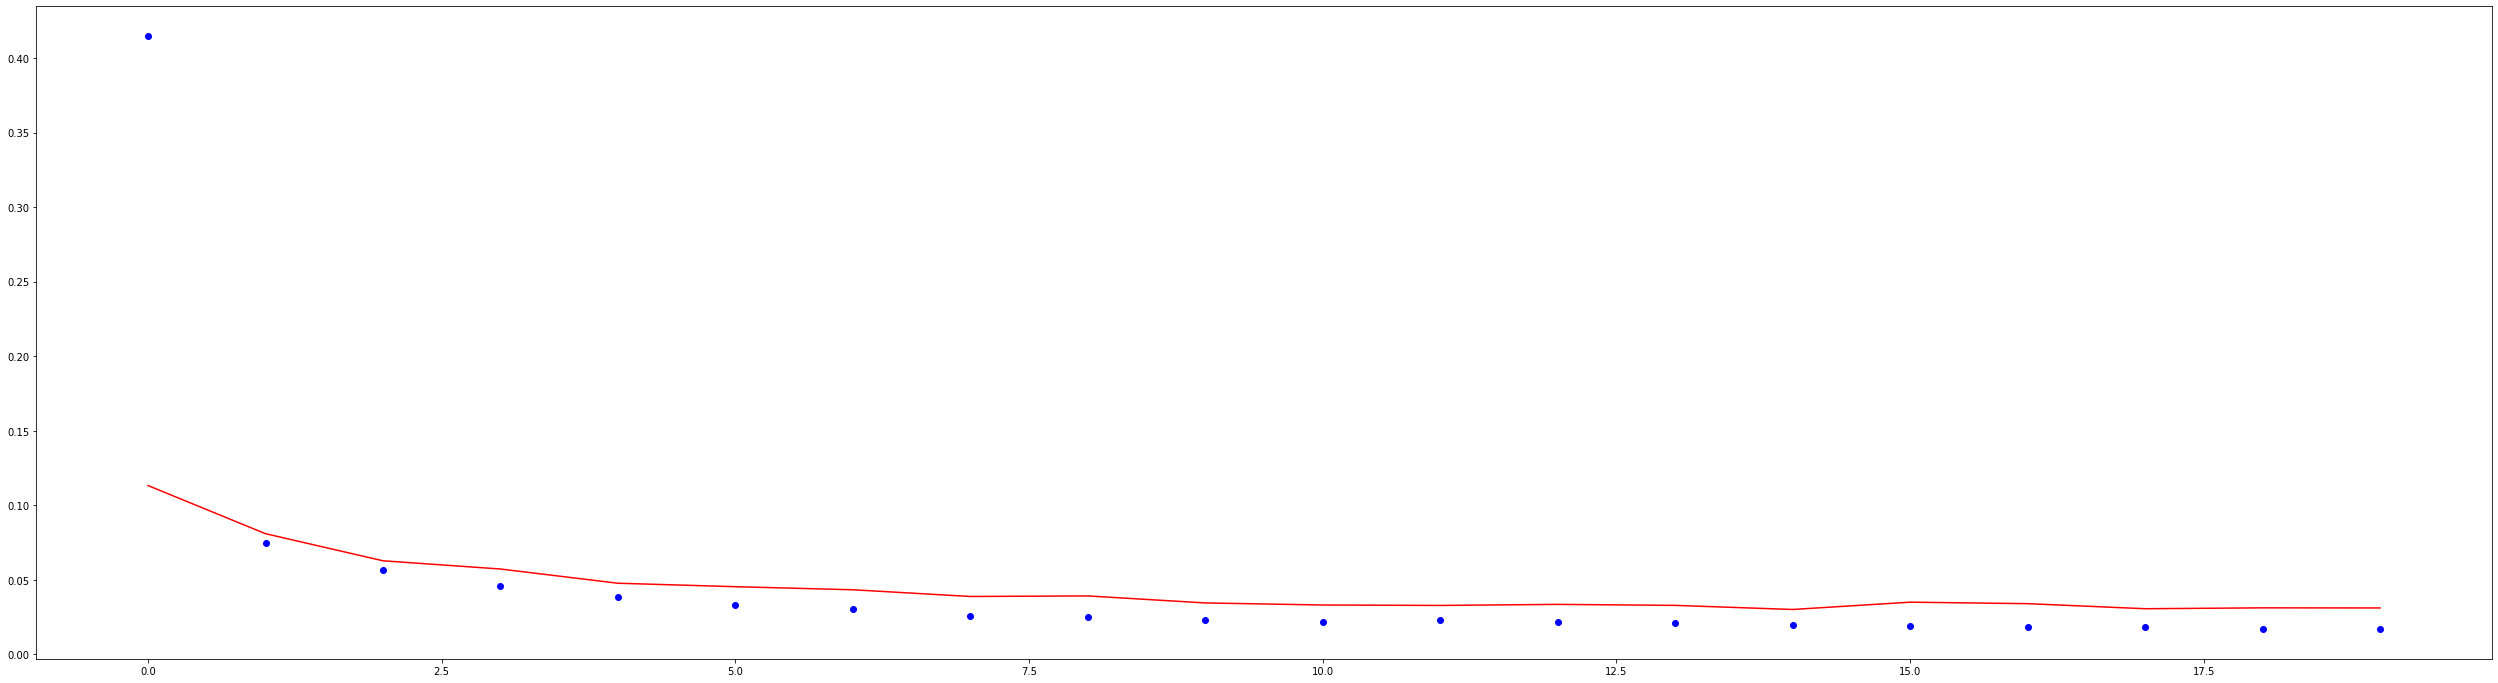

In [ ]:
def my_GRU():

    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]),activation='relu'))
    model.add(GRU(units=64, return_sequences=True,activation='relu'))
    model.add(GRU(units=64, return_sequences=False,activation='relu'))

    model.add(Dense(units=1, activation='linear'))

    return model
callbacks = [EarlyStopping(patience=5, restore_best_weights=True)]
model = my_GRU()

model.compile(optimizer='adam',
              loss='mse')

history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=5000, batch_size=128, callbacks=callbacks)
history_dict=history.history

loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
plt.figure(figsize=(44,12))
plt.plot(loss_values, 'bo', label='train loss')
plt.plot(val_loss_values, 'r', label='validation train loss')

In [ ]:
#plt.plot(history_gru.history_gru['loss'], lable= "train")
#plt.plot(history_gru.history_gru'val_loss'], lable= "validation")
#plt.legend()

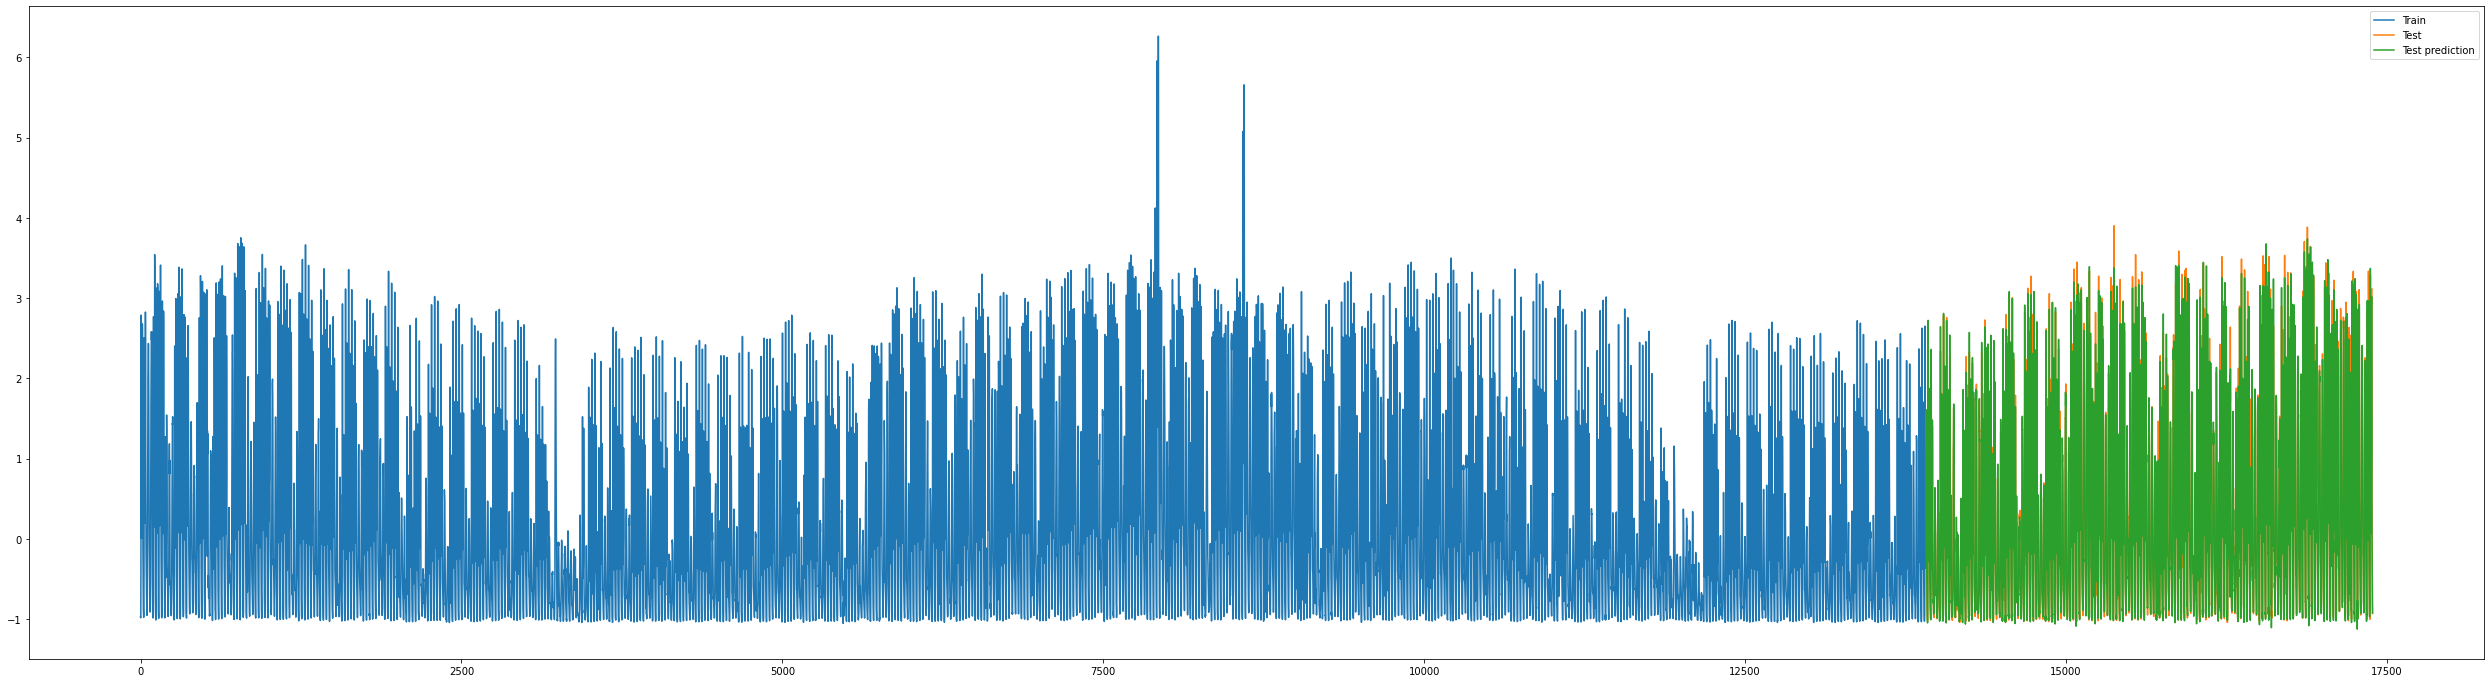

In [ ]:
plt.figure(figsize=(44,12))
plt.plot(np.arange(len(X_train)), y_train, label='Train')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), model.predict(X_test), label='Test prediction')
plt.legend()
plt.show()

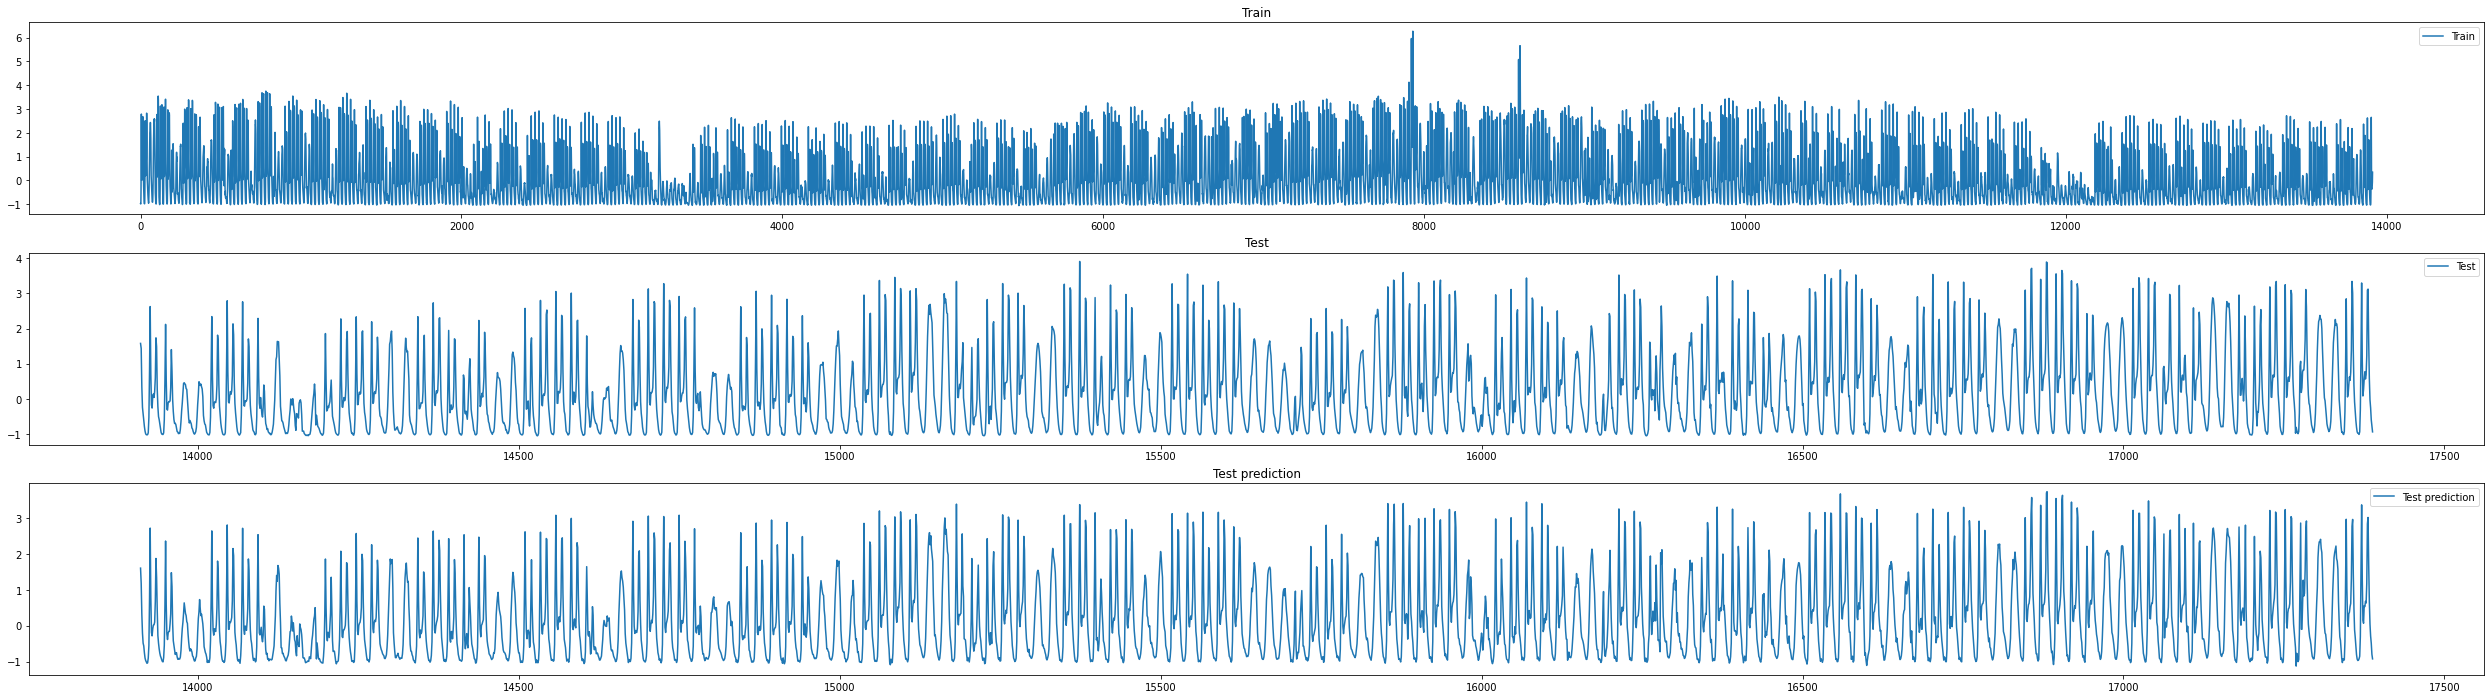

In [ ]:
plt.figure(figsize=(44,12))

plt.subplot(311)
ax1=plt.plot(np.arange(len(X_train)), y_train, label='Train')
ax1=plt.title('Train')
plt.legend()
plt.subplot(312)
ax2=plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
ax2=plt.title('Test')
plt.legend()
plt.subplot(313)
ax3=plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), model.predict(X_test), label='Test prediction')
ax3=plt.title('Test prediction')
plt.legend()
plt.show()

#4.5 RNN conclusion

To conclud about the modelinsation all those 3 RNN model have good RMSE's performance but the LSTM preforming with less epoch than the other model. the LSTM will be model choosen.